In [128]:
import pandas as pd
from hydra.utils import get_original_cwd
import os
from utils.utils import Timer, get_logger
import moses
import numpy as np
import nltk
import matplotlib.pyplot as plt
import openpyxl
import torch
import seaborn as sns
import sacrebleu
import nltk

In [185]:
source_data = pd.read_pickle('datasets/outputs/WMT22_News_Systems_df.pkl')
ocr_data = pd.read_pickle('datasets/outputs/WMT22_News_Systems_OCR_df.pkl')
reference = pd.read_pickle('datasets/outputs/WMT22_News_Systems_Reference.pkl')
tweet_data = pd.read_pickle('datasets/outputs/tweets_df.pkl')
evaluate_data = pd.read_pickle('evaluate/temp/data.pkl')

## Scoring
***

In [135]:
chencherry = nltk.translate.bleu_score.SmoothingFunction()
ocr_scores['bleu'] = ocr_scores.apply(lambda x: [nltk.translate.bleu_score.sentence_bleu(x['translation'][ind], x['reference'][ind], smoothing_function=chencherry.method7) 
                                                for ind in np.arange(len(x['reference']))] if (len(x['reference']) == 10 and len(x['translation']) == 10) else None, axis=1)

In [136]:
ter = sacrebleu.metrics.ter.TER(
                    normalized = False,
                    no_punct = True,
                    asian_support = False,
                    case_sensitive = False
                )
ocr_scores['ter'] = ocr_scores.apply(lambda x: [ter.sentence_score(x['translation'][ind], [x['reference'][ind]]).score
                                                for ind in np.arange(len(x['reference']))] if (len(x['reference']) == 10 and len(x['translation']) == 10) else None, axis=1)
            

In [137]:
chrf = sacrebleu.metrics.chrf.CHRF(
                    char_order = 6,
                    word_order = 0,
                    beta = 2,
                    lowercase = False,
                    whitespace = False,
                    eps_smoothing = False
                )
ocr_scores['chrf'] = ocr_scores.apply(lambda x: [chrf.sentence_score(x[f'translation'][ind], [x['reference'][ind]]).score
                                                for ind in np.arange(len(x['reference']))] if (len(x['reference']) == 10 and len(x['translation']) == 10) else None, axis=1)

In [143]:
# Change the default columns shown when rendering a dataframe

pd.set_option('display.max_columns', 100) # Show all columns
pd.set_option('display.max_rows', 100) # Show all rows

## Data Join (source_data | ocr_data) 
***

In [162]:
data = ocr_data.join(source_data, how='left', lsuffix='_ocr', rsuffix='_source')
data = data.join(reference, how='left')
# data.drop(['ocr_source', 'source_source', 'reference_source'], axis = 1, inplace=True)
data.rename({'source_ocr': 'ocr', 'source_source':'source'}, axis=1, inplace=True)

# # Rearrange the translation_source column in data columns next to the translation_ocr column
# cols = list(data.columns)
# cols.pop(cols.index('source_translation'))
# cols.insert(4, 'source_translation')

# data = data[cols]
# data.sort_index(inplace=True)

In [163]:
data

,ocr,translation_ocr,time_ocr,bleu_ocr,ter_ocr,chrf_ocr,overall_sentiment_ocr,emotion_ocr,hate_ocr,irony_ocr,overall_sentiment_score_ocr,source,translation_source,time_source,overall_sentiment_source,emotion_source,hate_source,irony_source,bleu_source,ter_source,chrf_source,overall_sentiment_score_source,reference
testDoc_num1.txt,"[С моей точки зрения, программа по литературе ...","[In my opinion, the program of literature was ...","[1.2880337920000002, 0.9547591250000007, 1.099...","[0.09974791910703944, 0.11261430239776324, 0.1...","[66.66666666666666, 50.0, 46.666666666666664, ...","[62.65270054337102, 84.57353564732824, 59.8269...","[NEU, NEU, NEU, NEG, NEG, POS, NEU, NEU, NEU, ...","[others, others, others, others, others, other...","[[], [], [], [], [], [], [], [], [], []]","[not ironic, not ironic, not ironic, ironic, n...",-0.2,"[С моей точки зрения, программа по литературе ...","[In my opinion, the program of literature was ...","[1.393349833000002, 1.1628561659999832, 1.2503...","[NEU, NEU, NEU, NEG, NEG, POS, NEU, NEU, NEU, ...","[others, others, others, others, others, other...","[[], [], [], [], [], [], [], [], [], []]","[not ironic, not ironic, not ironic, ironic, n...","[0.096502853099822, 0.10811768785762108, 0.105...","[66.66666666666666, 50.0, 46.666666666666664, ...","[62.65270054337102, 84.57353564732824, 59.8269...",-0.2,"[In my opinion, the literature program was cre..."
testDoc_num10.txt,[У них имеется 30 реактивных самолетов на авиа...,[They have 30 jets at Gardabiya air base (also...,"[1.7235297500000009, 2.214442332999999, 1.5705...","[0.09654377425993446, 0.08337452973561689, 0.0...","[41.66666666666667, 22.857142857142858, 27.272...","[61.54668949863247, 80.14210629056014, 75.4883...","[NEU, NEU, NEU, NEU, NEG, NEU, NEU, NEU, NEU, ...","[others, disgust, others, others, others, othe...","[[], [], [], [], [], [], [], [], [], []]","[ironic, ironic, not ironic, not ironic, not i...",-0.2,[У них имеется 30 реактивных самолетов на авиа...,[They have 30 jets at Gardabiya airbase (also ...,"[1.8950096659998508, 2.3265084170000137, 1.543...","[NEU, NEU, NEU, NEU, NEG, NEU, NEU, NEU, NEU, ...","[others, others, others, others, others, other...","[[], [], [], [], [], [], [], [], [], []]","[not ironic, ironic, not ironic, not ironic, n...","[0.10038223933337394, 0.08463811018837525, 0.0...","[45.83333333333333, 22.857142857142858, 27.272...","[68.8806859073511, 80.3345882204529, 75.488371...",-0.2,[They have 30 jets at Gardabia air bases (also...
testDoc_num100.txt,[Собаки не могут играть в шахматы или сочинять...,"[Dogs cannot play chess or compose poetry, und...","[1.498303374999999, 1.5525138750000025, 1.1219...","[0.08864160668291557, 0.08383308595999704, 0.0...","[34.78260869565217, 25.0, 35.714285714285715, ...","[68.78891505385444, 77.62830273792312, 81.7451...","[NEG, POS, POS, POS, NEU, NEU, NEU, POS, NEU, ...","[disgust, others, others, others, others, othe...","[[], [], [], [], [], [], [], [], [], []]","[not ironic, not ironic, not ironic, not ironi...",0.3,[Собаки не могут играть в шахматы или сочинять...,"[Dogs cannot play chess or compose poetry, und...","[1.8275295829998868, 1.693688833999886, 1.2235...","[NEG, POS, POS, POS, NEU, NEU, NEU, POS, NEU, ...","[disgust, others, others, others, others, othe...","[[], [], [], [], [], [], [], [], [], []]","[not ironic, not ironic, not ironic, not ironi...","[0.08846840837364223, 0.08351397630258793, 0.0...","[34.78260869565217, 25.0, 35.714285714285715, ...","[68.78891505385444, 77.62830273792312, 81.7451...",0.3,"[Dogs cannot play chess or write poetry, they ..."
testDoc_num101.txt,[Человек принимает естественную форму во время...,[A person takes a natural form while sleeping....,"[0.5898981669999941, 0.8694354160000017, 1.189...","[0.10511559012933973, 0.09441155313019334, 0.0...","[90.0, 28.57142857142857, 71.42857142857143, 2...","[33.77771410711532, 61.08481722177571, 61.6680...","[NEU, NEU, POS, NEU, NEU, POS, NEU, NEG, NEG, ...","[others, other

In [164]:
def check_length(row):
    if len(row['ocr']) < 10:
        return True
    elif len(row['source']) < 10:
        return True
    elif len(row['reference']) < 10:
        return True
    elif len(row['translation_ocr']) < 10:
        return True
    elif len(row['translation_source']) < 10:
        return True
    else:
        return False

In [165]:
incomplete_rows = []
data.apply(lambda x: incomplete_rows.append(x.name) if check_length(x) else None, axis =1)

# Remove the incomplete columns from the complete columns
complete_rows = [x for x in data.index if x not in incomplete_rows]

In [166]:
incomplete_rows

['testDoc_num170.txt', 'testDoc_num63.txt']

In [167]:
data.dropna(inplace=True)

## Translation Differences
***

Test: source_translation is the same as our our ocr_translation

In [169]:
data['translation_source'].equals(data['translation_ocr'])

False

## Translation Scoring Diffferences
***

In [170]:
data_scores = data.explode(['source', 'ocr', 'reference', 'translation_ocr', 'translation_source','bleu_ocr', 'ter_ocr', 'chrf_ocr', 'bleu_source', 'ter_source', 'chrf_source'])

In [171]:
data_scores['bleu_diff'] = abs(data_scores['bleu_ocr']-data_scores['bleu_source'])
data_scores['chrf_diff'] = abs(data_scores['chrf_ocr']-data_scores['chrf_source'])
data_scores['ter_diff'] = abs(data_scores['ter_ocr']-data_scores['ter_source'])

Text(0.5, 1.0, 'BLEU_ocr vs BLEU_source')

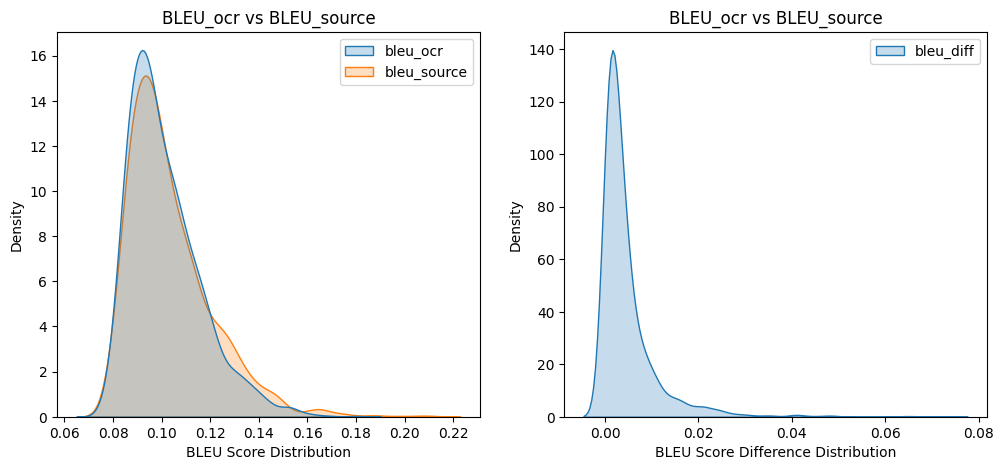

In [172]:
# Plot the distribution of the scores together (bleu_ocr, chrf_ocr, ter_ocr)

plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
sns.kdeplot(data_scores[['bleu_ocr', 'bleu_source']], fill=True)
plt.xlabel('BLEU Score Distribution')
plt.title('BLEU_ocr vs BLEU_source')

ax1 = plt.subplot(1,2,2)
sns.kdeplot(data_scores[['bleu_diff']], fill=True)
plt.xlabel('BLEU Score Difference Distribution')
plt.title('BLEU_ocr vs BLEU_source')


Text(0.5, 1.0, 'TER_ocr vs TER_source')

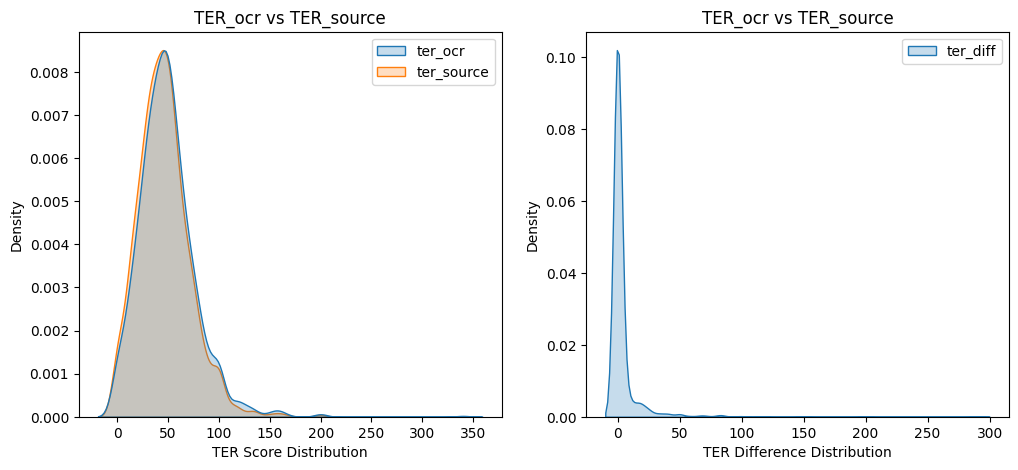

In [173]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
sns.kdeplot(data_scores[['ter_ocr', 'ter_source']], fill=True)
plt.xlabel('TER Score Distribution')
plt.title('TER_ocr vs TER_source')

ax2 = plt.subplot(1,2,2)
sns.kdeplot(data_scores[['ter_diff']], fill=True)
plt.xlabel('TER Difference Distribution')
plt.title('TER_ocr vs TER_source')

Text(0.5, 1.0, 'CHRF_ocr vs CHRF_source')

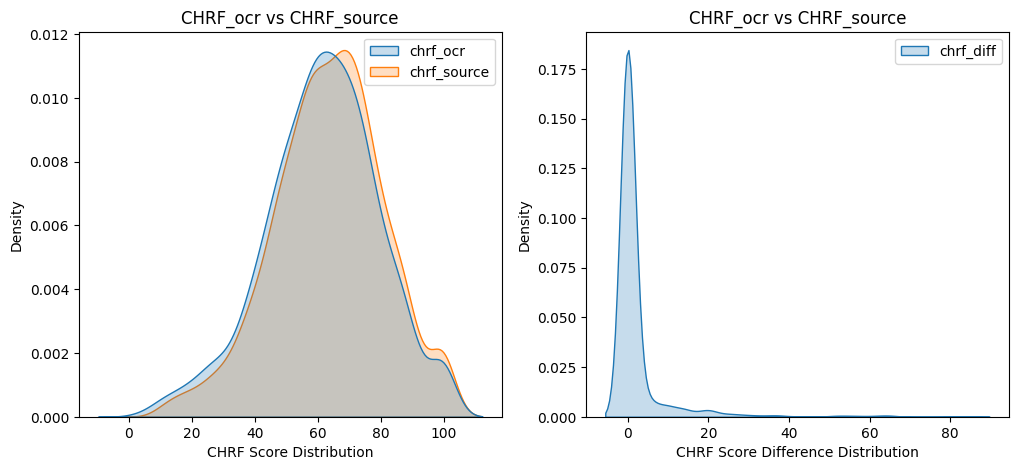

In [174]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
sns.kdeplot(data_scores[['chrf_ocr', 'chrf_source']], fill=True)
plt.xlabel('CHRF Score Distribution')
plt.title('CHRF_ocr vs CHRF_source')

ax2 = plt.subplot(1,2,2)
sns.kdeplot(data_scores[['chrf_diff']], fill=True)
plt.xlabel('CHRF Score Difference Distribution')
plt.title('CHRF_ocr vs CHRF_source')

<Axes: >

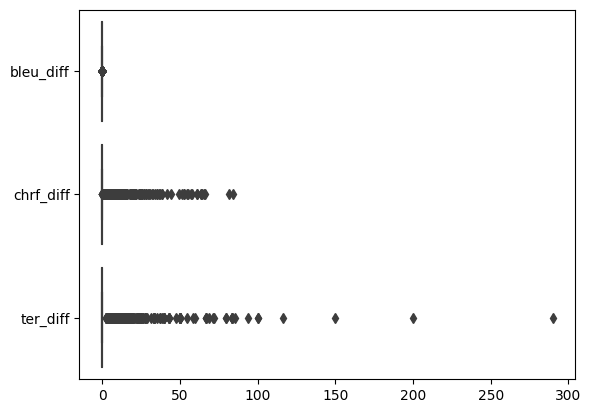

In [221]:
# Produce a visualization of bleu_diff, chrf_diff, and ter_diff, and their distributions

sns.boxplot(data=data_scores[['bleu_diff', 'chrf_diff', 'ter_diff']], orient='h')
#data_scores['bleu_diff'].plot.hist(bins=100, alpha=0.5)

In [218]:
# Frameshift example
data_scores[data_scores['ter_diff'] > 10].sort_values(by='ter_diff', ascending=False).iloc[0][['source_translation', 'ocr_translation']].to_dict()

{'source_translation': ['At the end, Hartwell called on Western countries to "stand together against Russia."',
  "The WSJ readers expressed their disagreement with the American professor's position.",
  '"There is quite a lot of false information in this article," RIA Novosti quotes one reader as saying.',
  '"Europe is not ours to" lose, "and Ukraine is not our land.',
  'The US and NATO allies will never engage in a nuclear war with Russia for Ukraine\'s sake, "noted another.',
  'Patches can also be applied to the lips.',
  'The hydrogel used in the production of the Dearboo Peach & Hibiscus Brightening Hydrogel Eye Patch is a high-tech polymer that provides increased absorption and transfer of highly concentrated natural plant essences to the skin, tightly adheres to the skin and gives a sense of freshness.',
  'When transmitting nutrients to the skin, hydrogel minimizes the associated loss of moisture and causes the essences to penetrate deeper layers of the skin.',
  'The light 

In [175]:
print((data_scores['bleu_diff'].mean()))
print(data_scores['chrf_diff'].mean())
print(data_scores['ter_diff'].mean())

0.004667523819081054
2.306572319022973
3.549570693634831


## Twitter Data
***

In [176]:
#Rename sentiment column to source_sentiment

tweet_data.rename({'sentiment': 'source_sentiment'}, axis=1, inplace=True)

In [177]:
sentiment_map = {'POS': 'positive', 'NEG': 'negative', 'NEU': 'neutral'}
tweet_data['translation_sentiment'] = tweet_data['overall_sentiment'].apply(lambda x: x[0])
tweet_data['translation_sentiment'] = tweet_data['translation_sentiment'].map(sentiment_map)

In [178]:
tweet_data['sentiment_difference'] = tweet_data.apply(lambda x: 0 if x['source_sentiment'] == x['translation_sentiment'] else 1, axis=1)

In [179]:
sentiment_difference_data = tweet_data['sentiment_difference'].value_counts()/len(tweet_data)
sentiment_difference_data.index = ['Correct', 'Incorrect']
sentiment_difference_data

Correct      0.63
Incorrect    0.37
Name: sentiment_difference, dtype: float64

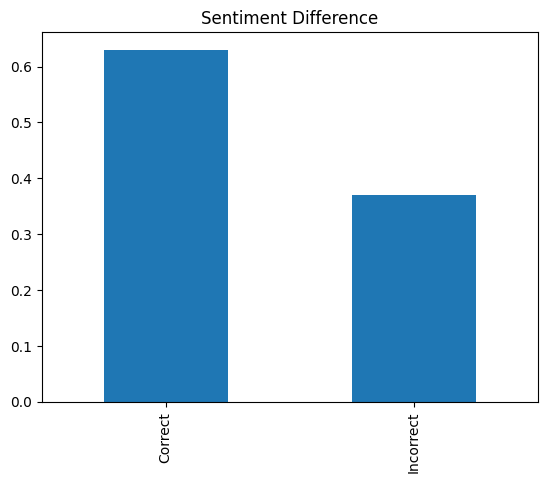

In [180]:
sentiment_difference = sentiment_difference_data.plot(kind='bar').set_title('Sentiment Difference')

In [181]:
tweet_data.sort_values(by = 'sentiment_difference', ascending = False, inplace = True)
tweet_data

,source,source_sentiment,id,tag,translation,time,overall_sentiment,emotion,hate,irony,translation_sentiment,sentiment_difference
65,Я БУДУ НАДЕЯТЬС,positive,1.315270e+18,False,[I WILL HAPPENED],[0.6099982919999998],[NEU],[others],[[]],[not ironic],neutral,1
58,мне кажется я заслужила мокко после всех этих ...,positive,1.214990e+18,False,[I think I deserved a mokka after all these ha...,[0.9438444170000011],[NEU],[others],[[]],[not ironic],neutral,1
79,Вот куда бы!!!!,neutral,1.338410e+18,False,[Here we go!!!!],[0.604278334],[POS],[joy],[[]],[not ironic],positive,1
42,Ни дня без #няши.1438,positive,1.265470e+18,False,[No day without # nayash.1438],[0.76795525],[NEU],[others],[[]],[not ironic],neutral,1
59,ммм обалденн,positive,1.316710e+18,False,[ммм банделенн],[0.896941666],[NEU],[others],[[]],[not ironic],neutral,1
10,"Общественное мнение - это мнение тех, кого не ...",negative,1.242690e+18,False,[Public opinion is the opinion of those who we...,[0.7991855830000034],[NEU],[others],[[]],[not ironic],neutral,1
8,"Всем привет, через неделю мне будет 29 и у мен...",negative,1.293890e+18,False,"[Hello everyone, I'll be 29 in a week and I do...",[1.4937870830000008],[NEU],[others],[[]],[ironic],neutral,1
20,"Я с утра въебался в стенку, Ни хуя не вижу - ч...",negative,1.338410e+18,False,"[In the morning I got into the wall, I can't s...",[1.0202235000000002],[NEU],[others],[[]],[not ironic],neutral,1
16,бля пойми твой желудок его уже обработа,negative,1.318670e+18,False,[Understand your stomach has already processed...,[0.6521573749999998],[NEU],[others],[[]],[not ironic],neutral,1
2,Уроженка России стала женой расчленившего журн...,negative,1.216380e+18,False,[The Russian native became the wife of the Dan...,[0.9750575419999947],[NEU],[others],[[]],[not ironic],neutral,1


In [182]:
# The sentiment difference shows that many negative tweets are being misclassified as neutral
pd.crosstab(tweet_data['translation_sentiment'], tweet_data['source_sentiment']).T

translation_sentiment,negative,neutral,positive
source_sentiment,,,
negative,16,18,0
neutral,4,25,3
positive,1,11,22


In [183]:
# Example of Positive, Negative, and Neutral Sentiment
tweet_data.loc[[56, 80, 60, 14]][['source', 'translation', 'source_sentiment', 'translation_sentiment']]

,source,translation,source_sentiment,translation_sentiment
56,Посылает тебе лучи любов,[Sends you beams of love],positive,positive
80,"Может они просто убедиться , умер мер таки ил...",[Can they just make sure he's dead or alive?],neutral,negative
60,каждый раз когда ты выкладываешь видео мой то...,[every time you post a video of my top favorit...,positive,neutral
14,А смысл? Через стор взять проблемно? Waste of tim,[And the point? Waste of time?],negative,negative
